# TP1

## Integrantes

#### - Christopher Sebastian Charaf Herrera
#### - Maria Fabiana 
#### - Yessika Arrieta

In [1]:
#IMPORTS
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


## Parte 1 (imágenes en /white_patch y /coord_cromaticas):

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [390]:
img1 = cv.imread('coord_cromaticas/CoordCrom_1.png')
img2 = cv.imread('coord_cromaticas/CoordCrom_2.png')
img3 = cv.imread('coord_cromaticas/CoordCrom_3.png')

coord_cromaticas = [img1, img2, img3]
for i in range(len(coord_cromaticas)):
    coord_cromaticas[i] = cv.cvtColor(coord_cromaticas[i], cv.COLOR_BGR2RGB)


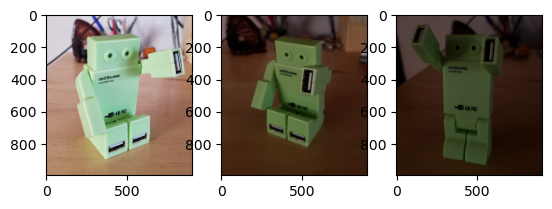

In [391]:
plt.figure()

for i in range(len(coord_cromaticas)):
    plt.subplot(1, len(coord_cromaticas), i+1)
    plt.imshow(coord_cromaticas[i])

plt.show()

In [392]:
def corr_cromatica(imagen):
    # Convertir la imagen a tipo float32 para realizar las operaciones
    imagen = imagen.astype(np.float32)

    # Separar los canales R, G, B
    R = imagen[:, :, 2]
    G = imagen[:, :, 1]
    B = imagen[:, :, 0]

    # Calcular la suma de los canales
    suma = R + G + B

    # Evitar división por cero
    suma[suma == 0] = 1

    # Normalizar cada canal
    R_norm = R / suma
    G_norm = G / suma
    B_norm = B / suma

    # Combinar los canales normalizados en una imagen resultante
    imagen_cromatica = cv.merge((B_norm, G_norm, R_norm))

    # Convertir de nuevo a formato uint8
    imagen_cromatica = (imagen_cromatica * 255).astype(np.uint8)
    
    return imagen_cromatica

In [393]:
coord_cromaticas_corr = [corr_cromatica(img) for img in coord_cromaticas]

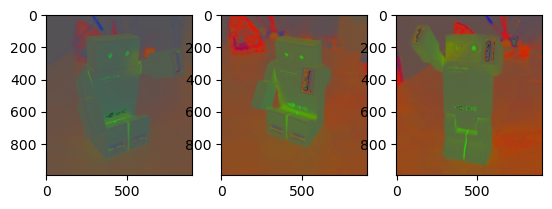

In [394]:
plt.figure()

for i in range(len(coord_cromaticas_corr)):
    plt.subplot(1, len(coord_cromaticas_corr), i+1)
    plt.imshow(coord_cromaticas_corr[i])

plt.show()

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación

In [395]:
img1 = cv.imread('white_patch/test_blue.png')
img2 = cv.imread('white_patch/test_green.png')
img3 = cv.imread('white_patch/test_red.png')
img4 = cv.imread('white_patch/wp_blue.jpg')
img5 = cv.imread('white_patch/wp_green.png')
img6 = cv.imread('white_patch/wp_green2.jpg')
img7 = cv.imread('white_patch/wp_red.png')
img8 = cv.imread('white_patch/wp_red2.jpg')

white_patch_imagenes = [img1, img2, img3, img4, img5, img6, img7,img8]
for i in range(len(white_patch_imagenes)):
    white_patch_imagenes[i] = cv.cvtColor(white_patch_imagenes[i], cv.COLOR_BGR2RGB)

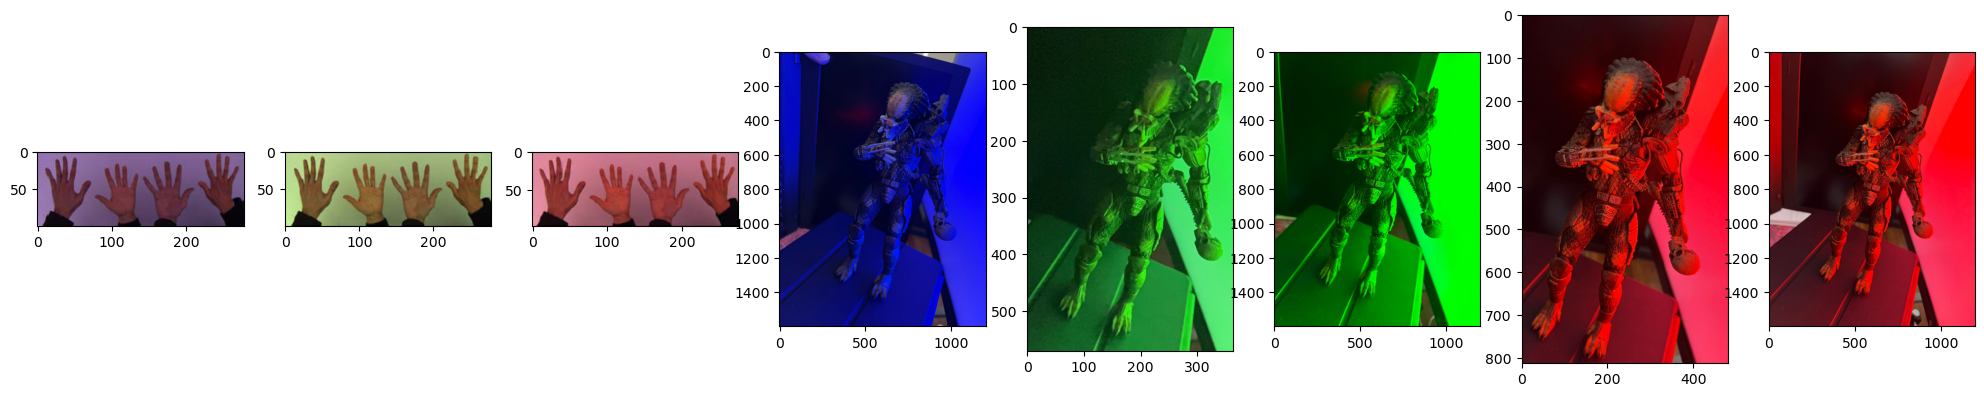

In [396]:
plt.figure(figsize=(25, 20))  # Set the figure size to 12 inches by 6 inches

for i in range(len(white_patch_imagenes)):
    plt.subplot(1, len(white_patch_imagenes), i+1)
    plt.imshow(white_patch_imagenes[i])

plt.show()

In [397]:
def corr_white_patch(img):
    # Find the maximum value for each channel
    max_val = np.max(img, axis=(0, 1))
    print('Valores máximos de cada canal para la imagen ', max_val)

    # Reduce the maximum value by 20% if it is 255
    if np.any(max_val == 255):
        print('Reduciendo el valor máximo en un 20%')
        max_val = max_val * 0.6
        max_val = np.clip(max_val, 0, 255).astype(np.uint8)
        print('Nuevos valores máximos de cada canal para la imagen ', max_val)

    # Normalize the image by dividing each channel by its maximum value
    img_norm = img / max_val
    img_norm = np.clip(img_norm, 0, 1)
    print('-----------------------------------------------------------------------------------')
    return img_norm

In [398]:
corr_white_patch_imagenes = [corr_white_patch(img) for img in white_patch_imagenes]

Valores máximos de cada canal para la imagen  [165 138 200]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [210 250 171]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [247 157 175]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [255 255 255]
Reduciendo el valor máximo en un 20%
Nuevos valores máximos de cada canal para la imagen  [153 153 153]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [126 252 155]
-----------------------------------------------------------------------------------
Valores máximos de cada canal para la imagen  [170 255 172]
Reduciendo el valor máximo en un 20%
Nuevos valores máximos de cada canal para la imagen  [102 153 103]
------------

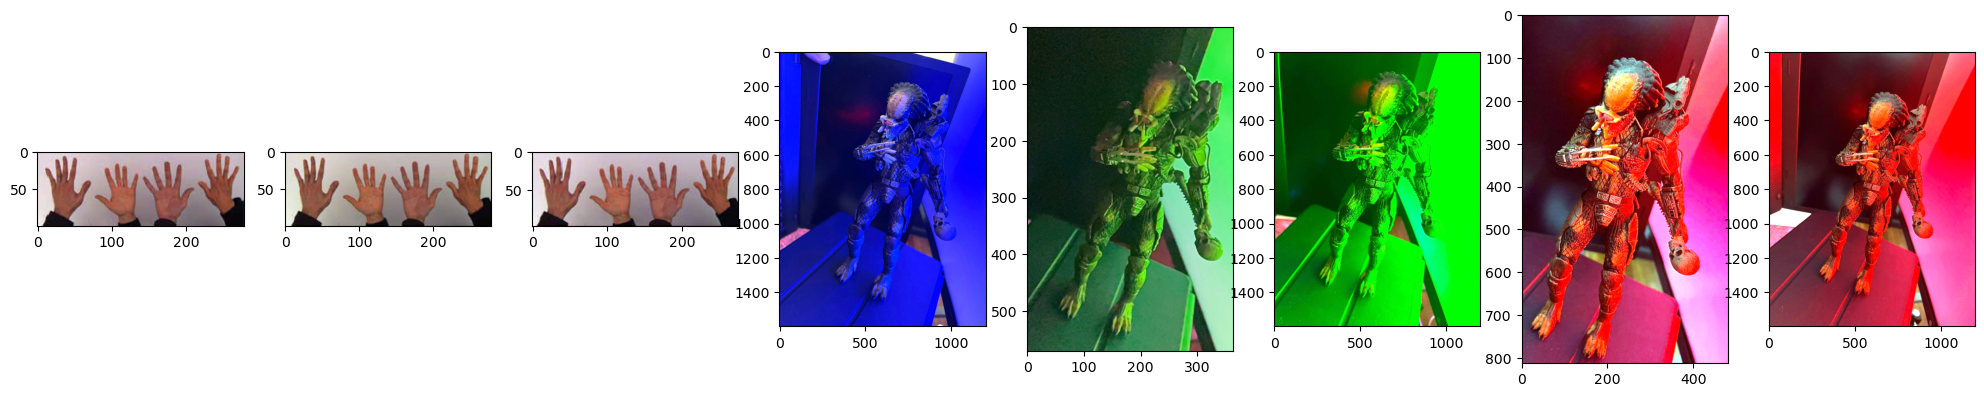

In [399]:
plt.figure(figsize=(25, 20))  # Set the figure size to 12 inches by 6 inches

for i in range(len(corr_white_patch_imagenes)):
    plt.subplot(1, len(corr_white_patch_imagenes), i+1)
    plt.imshow(corr_white_patch_imagenes[i])

plt.show()

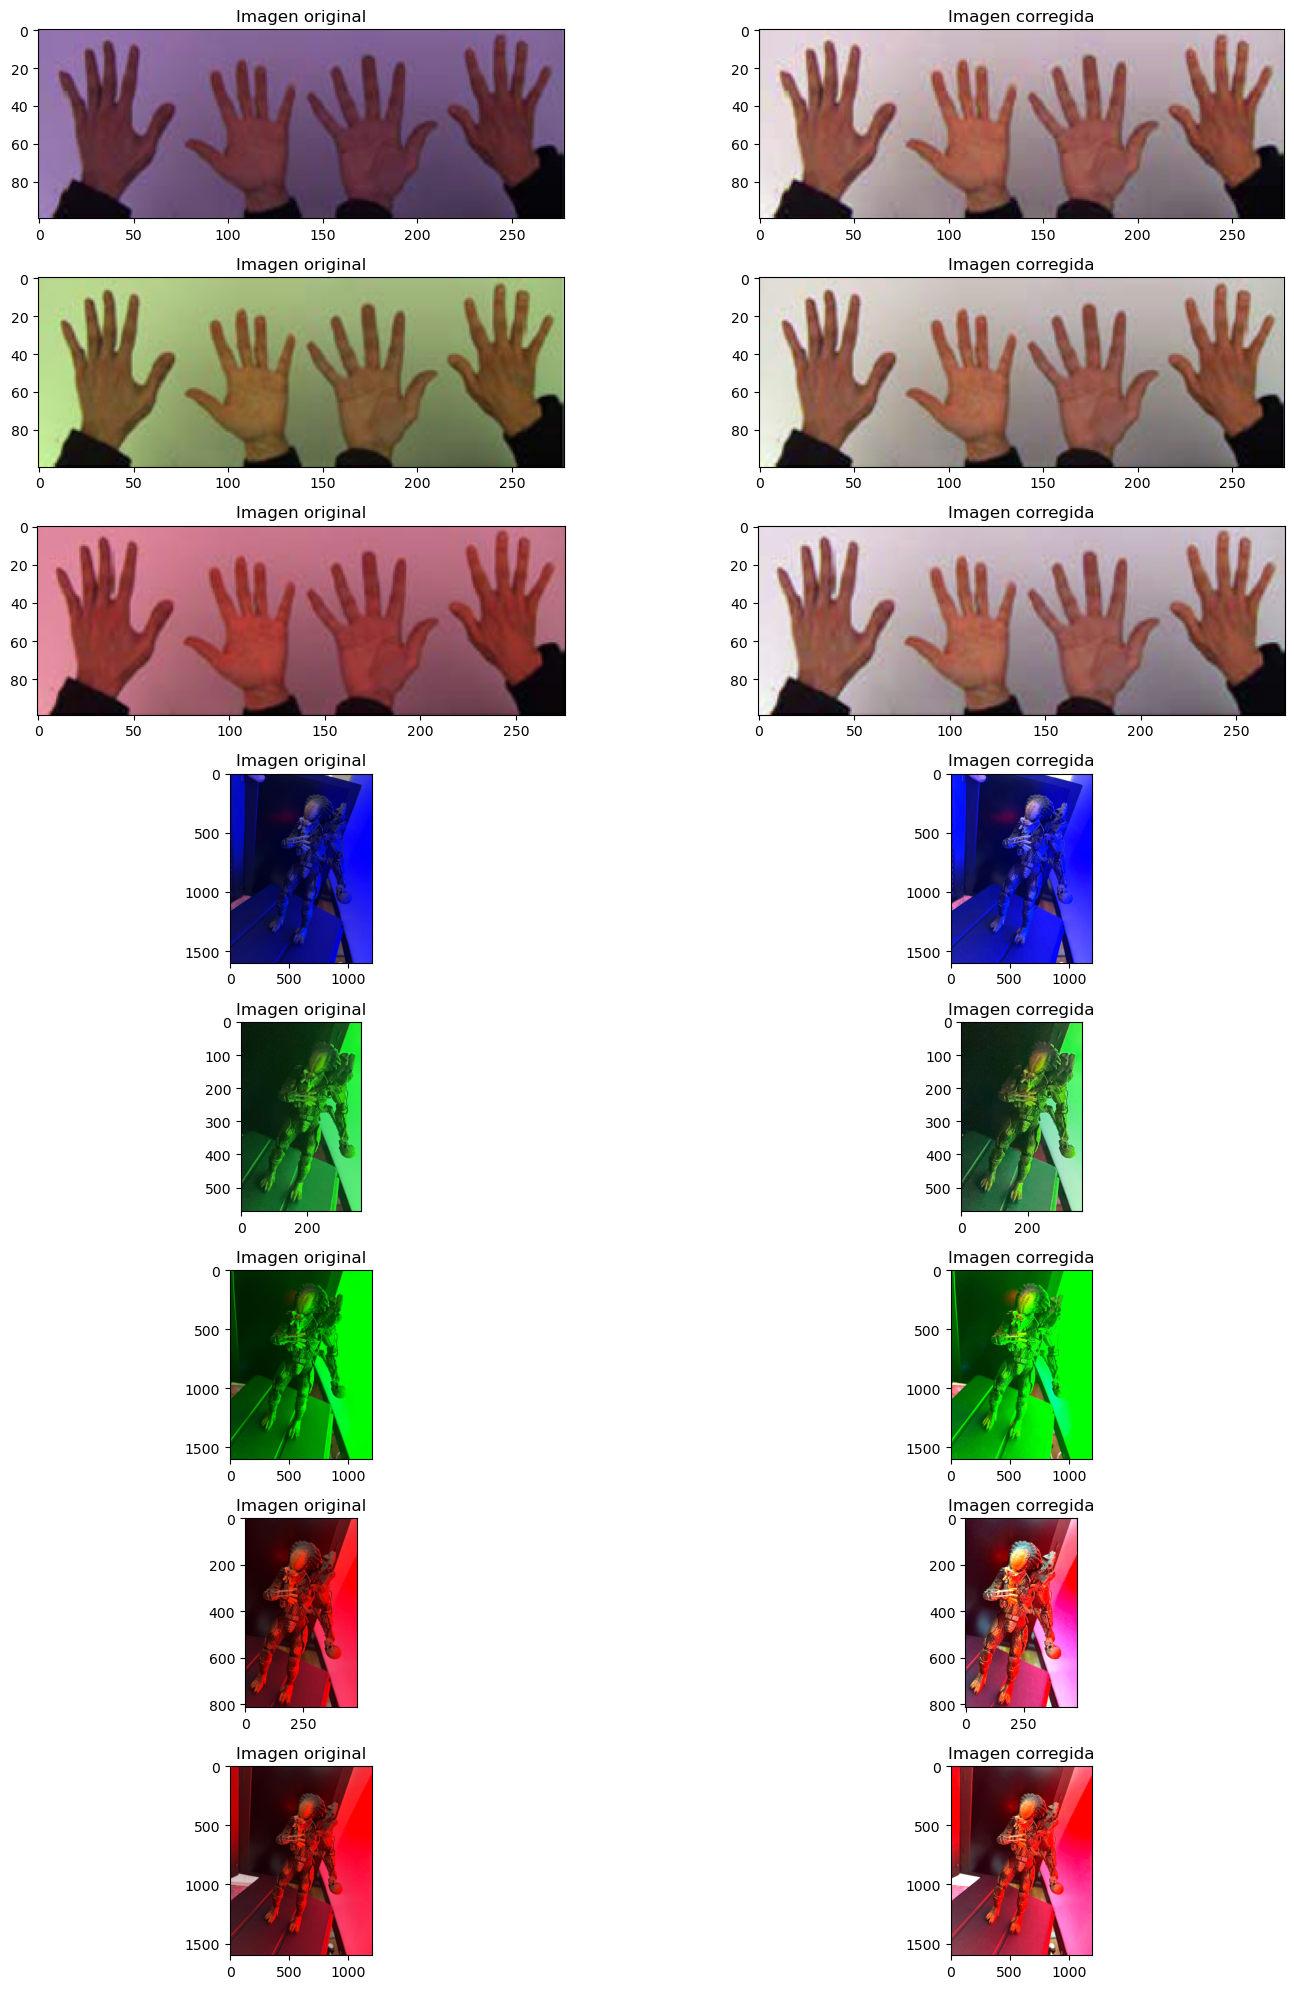

In [400]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=len(white_patch_imagenes), ncols=2, figsize=(15, 20))

# Iterate over the images and plot them
for i in range(len(white_patch_imagenes)):
    # Plot the image from white_patch_imagenes
    axes[i, 0].imshow(white_patch_imagenes[i])
    axes[i, 0].set_title('Imagen original')

    # Plot the image from corr_white_patch_imagenes
    axes[i, 1].imshow(corr_white_patch_imagenes[i])
    axes[i, 1].set_title('Imagen corregida')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas. 

In [54]:
img1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

imagenes_tp = [img1, img2]

In [60]:
imagenes_tp[0].shape

(288, 287)

In [62]:
# Visualizamos con funciones de opencv
cv.imshow('image', imagenes_tp[0   ])
# El programa cierra la ventana al presionar cualquie tecla
cv.waitKey(0) 
cv.destroyAllWindows()

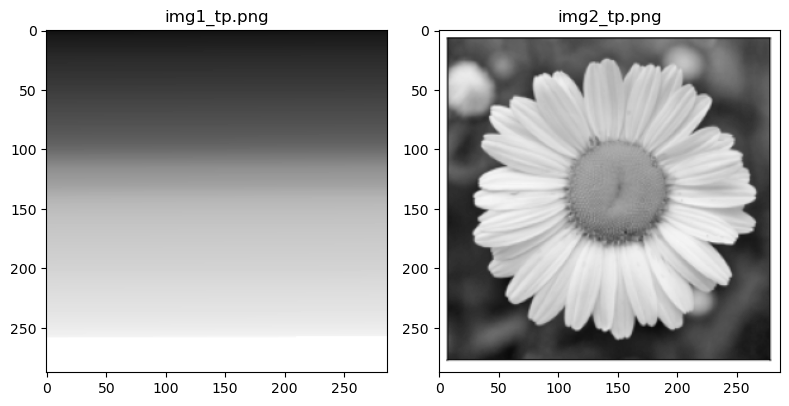

In [58]:
# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(imagenes_tp), figsize=(8, 8))

# Iterate over the images and plot them
for i in range(len(imagenes_tp)):
    axes[i].imshow(imagenes_tp[i], cmap='gray')
    axes[i].set_title(f'img{i+1}_tp.png')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

In [45]:
for i in range(len(imagenes_tp)):
    imagenes_tp[i] = cv.cvtColor(imagenes_tp[i], cv.COLOR_BGR2RGB)

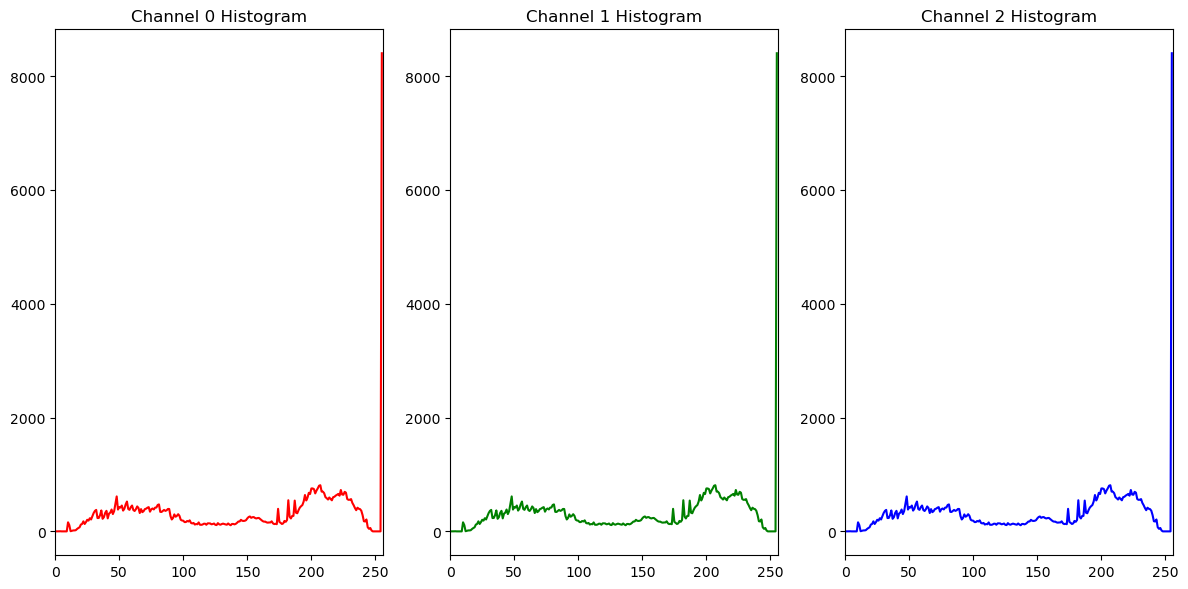

In [51]:
# Split the image into its color channels
channels = cv.split(imagenes_tp[1])

# Define the channels you want to plot (e.g., Red and Green channels)
channel_indices = [0, 1, 2]  # 0 for Red, 1 for Green in RGB

# Colors for the histograms
colors = ['r', 'g','b']

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(channel_indices), figsize=(12, 6))

# Iterate over the selected channels and plot their histograms
for i, channel_index in enumerate(channel_indices):
    # Compute the histogram for the channel
    hist = cv.calcHist([channels[channel_index]], [0], None, [256], [0, 256])
    
    # Plot the histogram
    axes[i].plot(hist, color=colors[i])
    axes[i].set_title(f'Channel {channel_index} Histogram')
    axes[i].set_xlim([0, 256])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.